In [124]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [125]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/german-credit")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\samue\.cache\kagglehub\datasets\uciml\german-credit\versions\1


In [126]:
import pandas as pd
import os

# Load the CSV file into a DataFrame
df = pd.read_csv("../data/german_credit_data.csv")
print(df.head())

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


In [127]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [128]:
df.shape

(1000, 11)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [130]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [131]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [132]:
df["Saving accounts"] = df["Saving accounts"].fillna("unknown")
df["Checking account"] = df["Checking account"].fillna("unknown")

In [133]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [134]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numerical:", numerical_cols)
print("Categorical:", categorical_cols)

Numerical: Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')
Categorical: Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')


In [135]:
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())



Sex:
['male' 'female']

Housing:
['own' 'free' 'rent']

Saving accounts:
['unknown' 'little' 'quite rich' 'rich' 'moderate']

Checking account:
['little' 'moderate' 'unknown' 'rich']

Purpose:
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']

Risk:
['good' 'bad']


In [136]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [137]:
num_cols = ['Age', 'Job', 'Credit amount', 'Duration']  
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

print(df.columns)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [138]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [139]:
df["Risk"].value_counts(normalize=True)

Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

In [140]:
df["Risk"] = df["Risk"].map({"good": 0, "bad": 1})
df["Risk"].value_counts(normalize=True)

Risk
0    0.7
1    0.3
Name: proportion, dtype: float64

In [141]:
x = df.drop(columns=["Risk"])
y = df["Risk"]

# Proper preprocessing Pipeline

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Feature Preprocessing Pipeline for Numerical and Categorical Data

In [143]:
numeric_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

## Random Forest Model Implementation

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [145]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       140
           1       0.60      0.40      0.48        60

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.72      0.74      0.72       200

ROC AUC Score: 0.7669642857142858


### Explainability

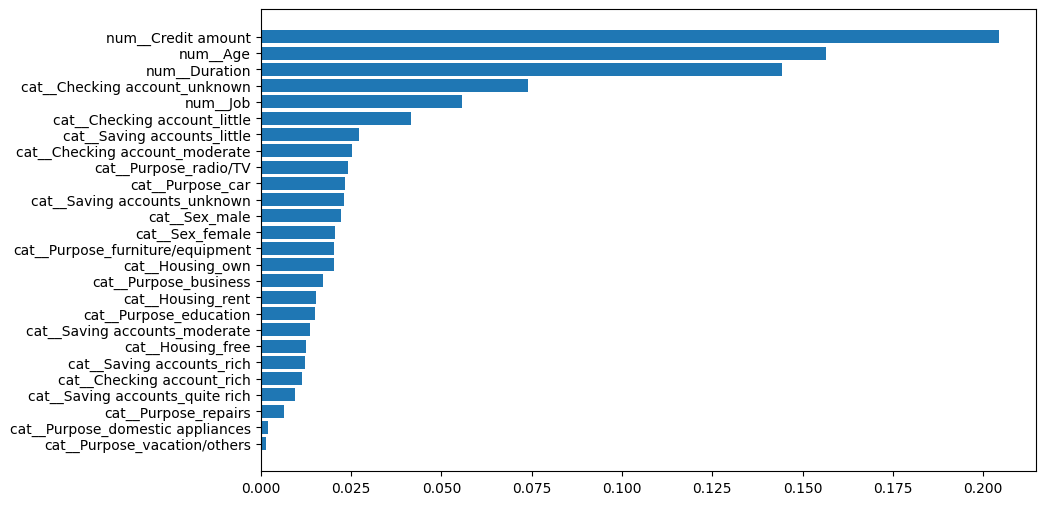

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

rf_model = model.named_steps["classifier"]
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df["feature"], feature_importance_df["importance"])
plt.gca().invert_yaxis()
plt.show()
